# Importing Libraries

In [1]:
import numpy as np                  #For mathematical calculations 
import pandas as pd                 #for working with data
import matplotlib.pyplot as plt     #For plotting graphs
import seaborn as sns               #For data visualization
import warnings 
warnings.filterwarnings('ignore')   #For ignoring warnings

## Reading csv files

In [2]:
df1 = pd.read_csv("train_loan.csv")
df2 = pd.read_csv("test_loan.csv")

## Train data

In [3]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df1.shape

(614, 13)

In [6]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Visualization

<Axes: xlabel='Credit_History', ylabel='count'>

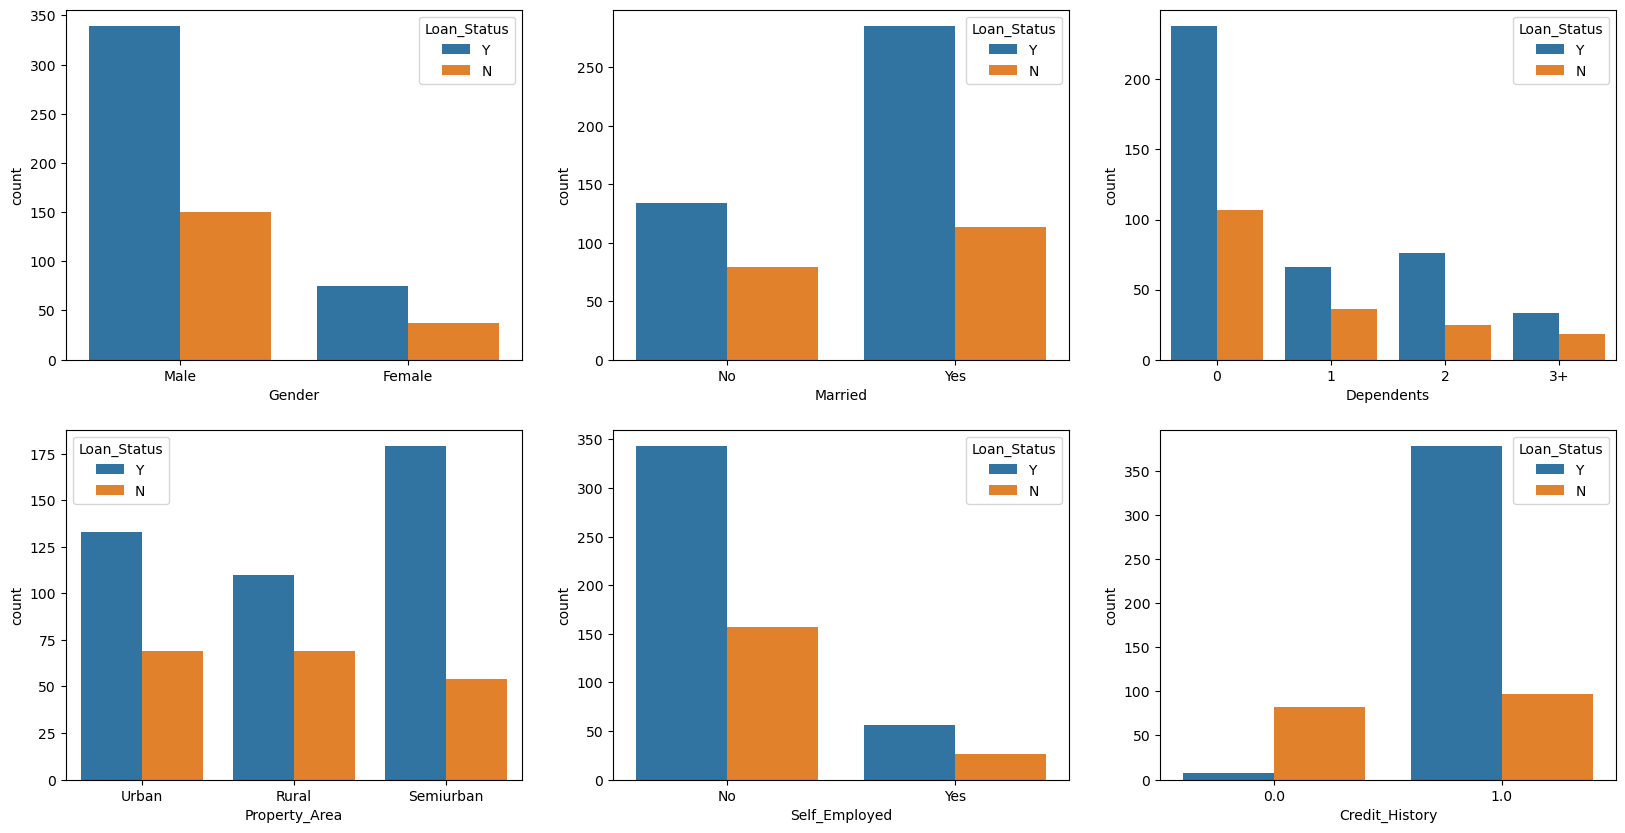

In [8]:
fig,ax = plt.subplots(figsize=(20,10),ncols=3,nrows=2)
#sns.barplot(x="Gender",y="Loan_",hue="Marital_Status",estimator=np.mean,data=df1,ax=ax[0])
sns.countplot(x="Gender",hue="Loan_Status",data=df1,ax=ax[0][0])
sns.countplot(x="Married",hue="Loan_Status",data=df1,ax=ax[0][1])
sns.countplot(x="Dependents",hue="Loan_Status",data=df1,ax=ax[0][2])
sns.countplot(x="Property_Area",hue="Loan_Status",data=df1,ax=ax[1][0])
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df1, ax=ax[1][1])
sns.countplot(x="Credit_History",hue="Loan_Status",data=df1, ax=ax[1][2])

# Handling Missing Values

In [9]:
#missing value
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df1['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
df1['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
df1['Gender'] = df1['Gender'].fillna('Male')

In [13]:
df1.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df1['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
df1['Married'].mode()

0    Yes
Name: Married, dtype: object

In [16]:
df1['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])

In [17]:
df1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
#append the dependents using a Dictionary

df1.Dependents=df1.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [20]:
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode()[0])

In [21]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
df1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df1['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [25]:
df1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
#Feature Engineering
# Creating a column called Total Income
# Adding up the Applicant and Co-applicants income
df1['TotalIncome'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']
df1.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [27]:
# Dropping Loan ID column
df1.drop('Loan_ID', axis=1, inplace=True)

In [28]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0.0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


In [29]:
df1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

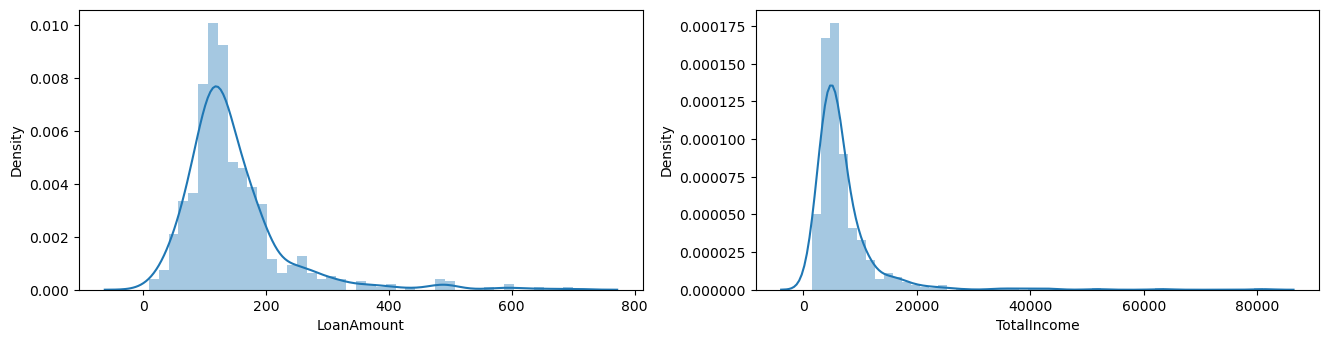

In [30]:
#Histogram
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['LoanAmount'])
plt.subplot(2,2,2)
sns.distplot(df1['TotalIncome'])
plt.show()


In [31]:
df1['TotalIncome'].value_counts

<bound method IndexOpsMixin.value_counts of 0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 614, dtype: float64>

In [32]:
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].median())

In [33]:
df1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount           0
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [34]:
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0])

In [35]:
df1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount           0
Loan_Amount_Term     0
Credit_History      50
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [36]:
df1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])

In [38]:
df1.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
TotalIncome         0
dtype: int64

In [39]:
df1.dtypes

Gender               object
Married              object
Dependents          float64
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
TotalIncome         float64
dtype: object

# Handling Outliers

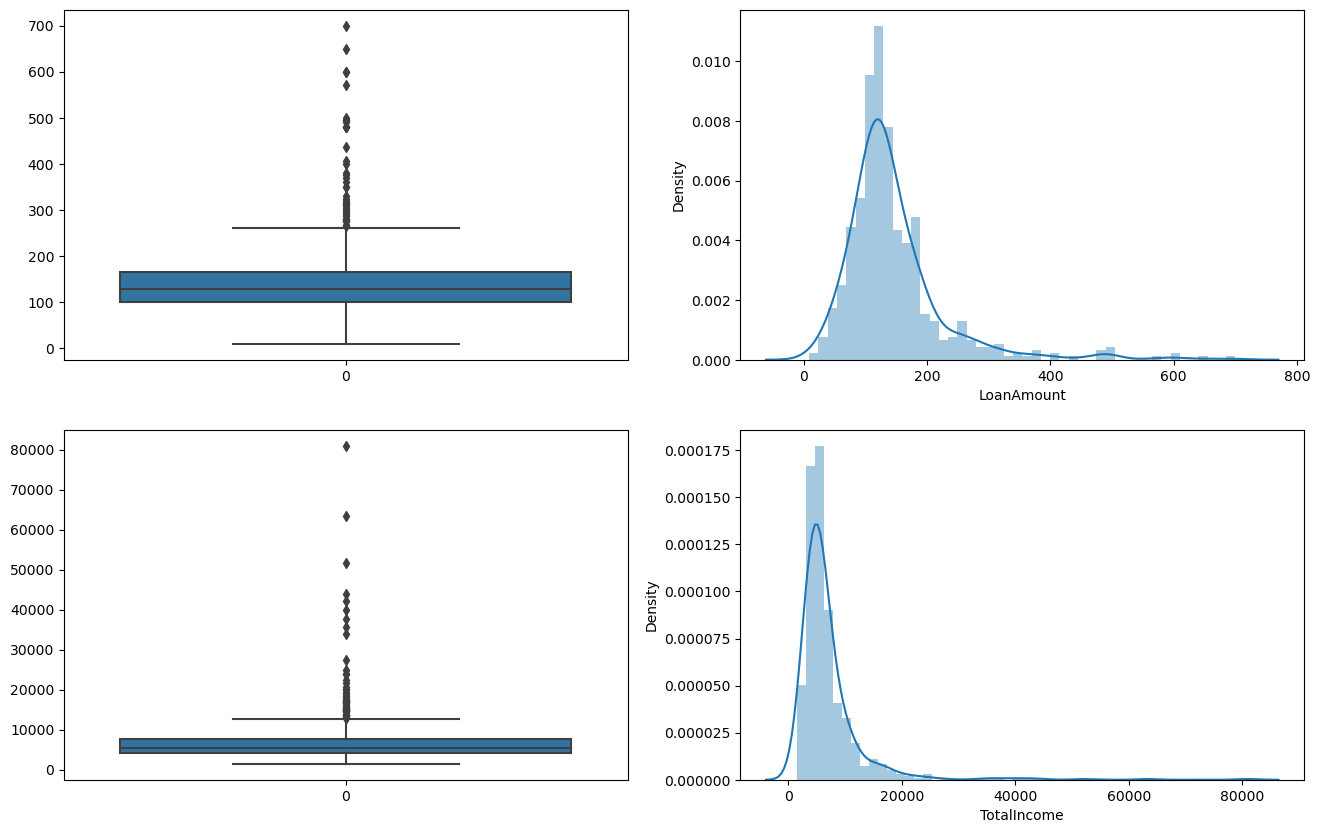

In [40]:
#Identifying Outliers with Visualization
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.boxplot(df1['LoanAmount'])
plt.subplot(2,2,2)
sns.distplot(df1['LoanAmount'])
plt.subplot(2,2,3)
sns.boxplot(df1['TotalIncome'])
plt.subplot(2,2,4)
sns.distplot(df1['TotalIncome'])
plt.show()

In [41]:
#Quantile-based Flooring and Capping on LoanAmount
print(df1['LoanAmount'].quantile(0.10))
print(df1['LoanAmount'].quantile(0.90))

72.30000000000001
229.4000000000001


In [42]:
df1["LoanAmount"] = np.where(df1["LoanAmount"] <72.30, 72.30,df1['LoanAmount'])
df1["LoanAmount"] = np.where(df1["LoanAmount"] >229.40, 229.40,df1['LoanAmount'])
print(df1['LoanAmount'].skew())

0.6054478885219593


In [43]:
#Quantile-based Flooring and Capping on TotalIncome
print(df1['TotalIncome'].quantile(0.10))
print(df1['TotalIncome'].quantile(0.90))

3245.8
11462.800000000007


In [44]:
df1["TotalIncome"] = np.where(df1["TotalIncome"] <3245.8, 3245.8,df1['TotalIncome'])
df1["TotalIncome"] = np.where(df1["TotalIncome"] >11462.80, 11462.80,df1['TotalIncome'])
print(df1['TotalIncome'].skew())

0.8789974086078624


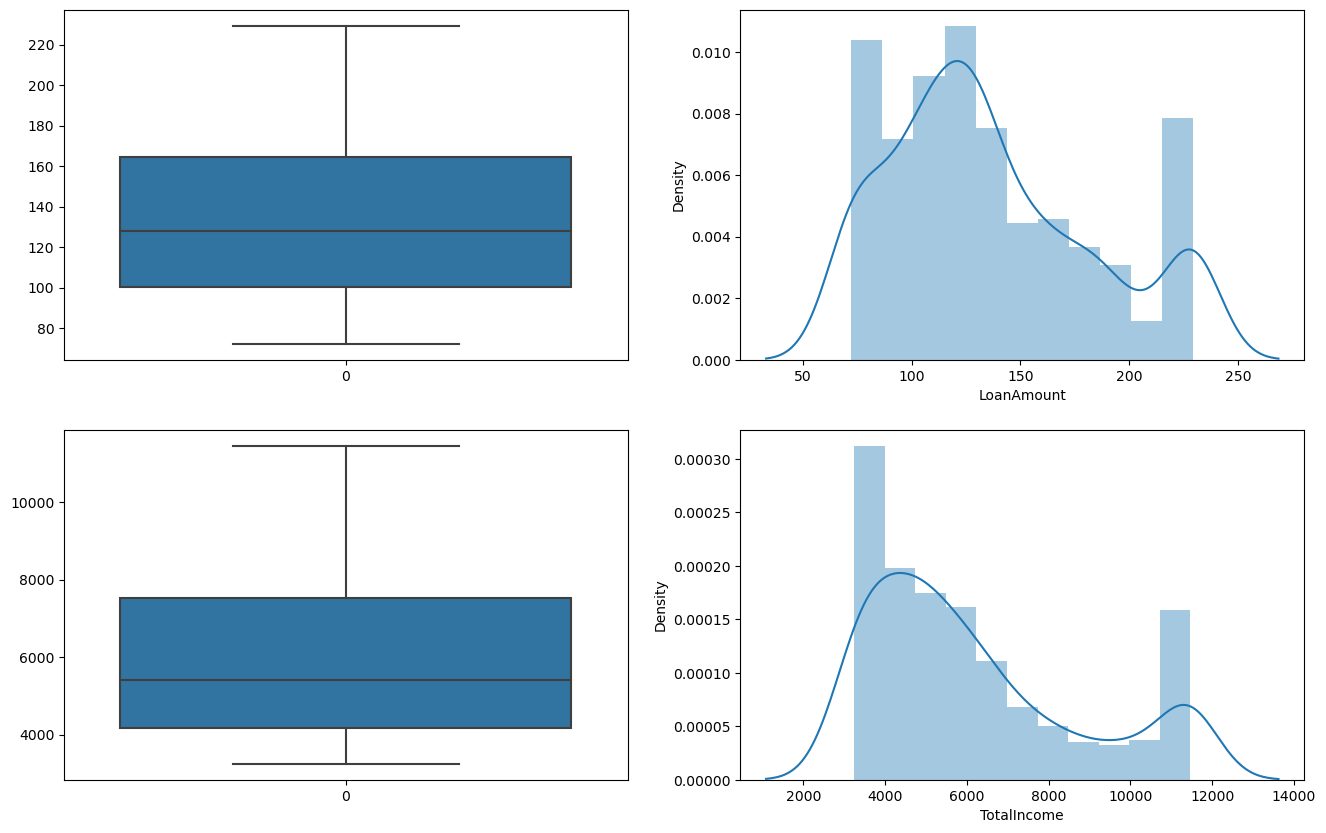

In [45]:
#After removing Outliers 
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.boxplot(df1['LoanAmount'])
plt.subplot(2,2,2)
sns.distplot(df1['LoanAmount'])
plt.subplot(2,2,3)
sns.boxplot(df1['TotalIncome'])
plt.subplot(2,2,4)
sns.distplot(df1['TotalIncome'])
plt.show()

# Encoding

In [46]:
# Performing Label encoding on Gender, Married, Education, Self Employed, Property area and loan status

from sklearn.preprocessing import LabelEncoder
var_col1 = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le1 = LabelEncoder()
for i in var_col1:
    df1[i] = le1.fit_transform(df1[i])

In [47]:
df1.dtypes

Gender                int32
Married               int32
Dependents          float64
Education             int32
Self_Employed         int32
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Loan_Status           int32
TotalIncome         float64
dtype: object

In [48]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0.0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1.0,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0.0,0,1,72.3,360.0,1.0,2,1,3245.8
3,1,1,0.0,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0.0,0,0,141.0,360.0,1.0,2,1,6000.0


In [49]:
df1.tail()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
609,0,0,0.0,0,0,72.3,360.0,1.0,0,1,3245.8
610,1,1,3.0,0,0,72.3,180.0,1.0,0,1,4106.0
611,1,1,1.0,0,0,229.4,360.0,1.0,2,1,8312.0
612,1,1,2.0,0,0,187.0,360.0,1.0,2,1,7583.0
613,0,0,0.0,0,1,133.0,360.0,0.0,1,0,4583.0


# Feature Scaling

In [50]:
req_cols1 = ['LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 'Property_Area','Dependents']

In [51]:
x1 = df1[req_cols1]
y1 = df1['Loan_Status']

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [53]:
x1.loc[:,['LoanAmount','TotalIncome']]  = sc.fit_transform(x1[['LoanAmount','TotalIncome']])

In [54]:
x1.head()

,LoanAmount,Loan_Amount_Term,TotalIncome,Property_Area,Dependents
0,-0.177604,360.0,-0.118202,2,0.0
1,-0.177604,360.0,-0.025064,0,1.0
2,-1.362687,360.0,-1.120088,2,0.0
3,-0.347814,360.0,-0.467661,2,0.0
4,0.098986,360.0,-0.060087,2,0.0


## Test data

In [55]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
df2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [57]:
# Dropping Loan ID column

df2.drop('Loan_ID', axis=1, inplace=True)

## Handling Missing Values

In [58]:
df2.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [59]:
df2['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [60]:
df2['Gender'] = df2['Gender'].fillna('Male')

In [61]:
df2.isnull().sum()

Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [62]:
# Mapping the Dependents using a Dictionary

df2.Dependents=df2.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [63]:
df2['Dependents'].value_counts()

0.0    200
2.0     59
1.0     58
3.0     40
Name: Dependents, dtype: int64

In [64]:
df2['Dependents']=df2['Dependents'].fillna(0)

In [65]:
df2.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [66]:
df2['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [67]:
df2['Self_Employed']=df2['Self_Employed'].fillna('No')

In [68]:
df2.isnull().sum()


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [69]:
df2['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [70]:
df2['Loan_Amount_Term']=df2['Loan_Amount_Term'].fillna(360.0)

In [71]:
# New column created as Total Income adding up Applicant and Coapplicants Incomes

df2['TotalIncome'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']

In [72]:
df2.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [73]:
df2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount           5
Loan_Amount_Term     0
Credit_History      29
Property_Area        0
TotalIncome          0
dtype: int64

In [74]:
df2['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [75]:
df2['Credit_History']=df2['Credit_History'].fillna(1.0)

(array([ 46., 160., 100.,  37.,   8.,   6.,   2.,   1.,   1.,   1.]),
 array([ 28. ,  80.2, 132.4, 184.6, 236.8, 289. , 341.2, 393.4, 445.6,
        497.8, 550. ]),
 <BarContainer object of 10 artists>)

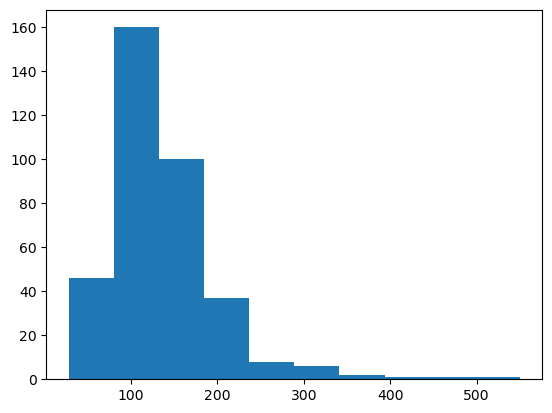

In [76]:
plt.hist(df2['LoanAmount'])

In [77]:
# Imputed Loan Amount NA values with the Median of the Column

df2.LoanAmount = df2.LoanAmount.fillna(df2.LoanAmount.median())

In [78]:
df2.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
TotalIncome         0
dtype: int64

In [79]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,Male,Yes,0.0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1.0,Graduate,No,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2.0,Graduate,No,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2.0,Graduate,No,100.0,360.0,1.0,Urban,4886
4,Male,No,0.0,Not Graduate,No,78.0,360.0,1.0,Urban,3276


## Handling Outliers

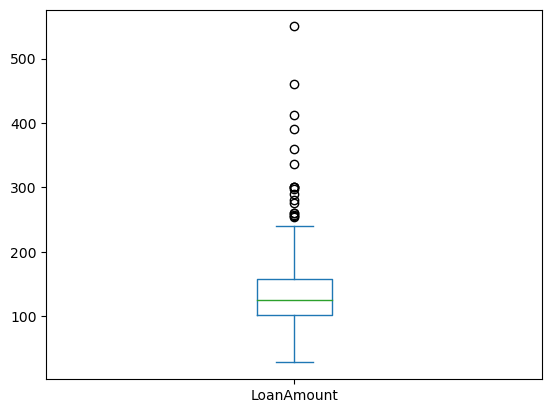

In [80]:
df2['LoanAmount'].plot(kind='box')
plt.show()

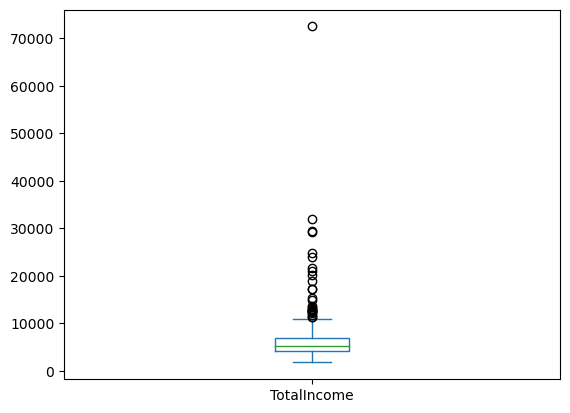

In [81]:
df2['TotalIncome'].plot(kind='box')
plt.show()

In [82]:
Q11 = df2['TotalIncome'].quantile(0.25)
Q21 = df2['TotalIncome'].quantile(0.5)
Q31 = df2['TotalIncome'].quantile(0.75)

In [83]:
IQR1 = Q31-Q11
IQR1

2824.0

In [84]:
low1 = Q11 - (1.5*IQR1)
up1 = Q31 + (1.5*IQR1)
print(low1,up1)

-80.0 11216.0


In [85]:
df2[(df2['TotalIncome']<low1) | (df2['TotalIncome']>up1)].index

Int64Index([  8,  13,  18,  25,  27,  36,  81,  85,  91, 124, 143, 145, 179,
            188, 189, 194, 230, 237, 263, 272, 279, 284, 289, 302, 323, 351,
            360],
           dtype='int64')

In [86]:
#Quantile-based Flooring and Capping on TotalIncome
print(df2['TotalIncome'].quantile(0.10))
print(df2['TotalIncome'].quantile(0.90))

3276.0
9180.2


In [87]:
df2["TotalIncome"] = np.where(df2["TotalIncome"] <3276.0, 3276.0,df2['TotalIncome'])
df2["TotalIncome"] = np.where(df2["TotalIncome"] >9180.2, 9180.2,df2['TotalIncome'])
print(df2['TotalIncome'].skew())

0.578586741530218


In [88]:
Q12 = df2['LoanAmount'].quantile(0.25)
Q22 = df2['LoanAmount'].quantile(0.5)
Q32 = df2['LoanAmount'].quantile(0.75)

In [89]:
IQR2 = Q32-Q12
IQR2

56.5

In [90]:
low2 = Q11 - (1.5*IQR2)
up2 = Q31 + (1.5*IQR2)
print(low2,up2)

4071.25 7064.75


In [91]:
df2[(df2['LoanAmount']<low2) | (df2['LoanAmount']>up2)].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            357, 358, 359, 360, 361, 362, 363, 364, 365, 366],
           dtype='int64', length=367)

In [92]:
#Quantile-based Flooring and Capping on LoanAmount
print(df2['LoanAmount'].quantile(0.10))
print(df2['LoanAmount'].quantile(0.90))

77.6
194.00000000000017


In [93]:
df2["LoanAmount"] = np.where(df2["LoanAmount"] <77.6, 77.6,df2['LoanAmount'])
df2["LoanAmount"] = np.where(df2["LoanAmount"] >194.0, 194.0,df2['LoanAmount'])
print(df2['LoanAmount'].skew())

0.29444406240626686


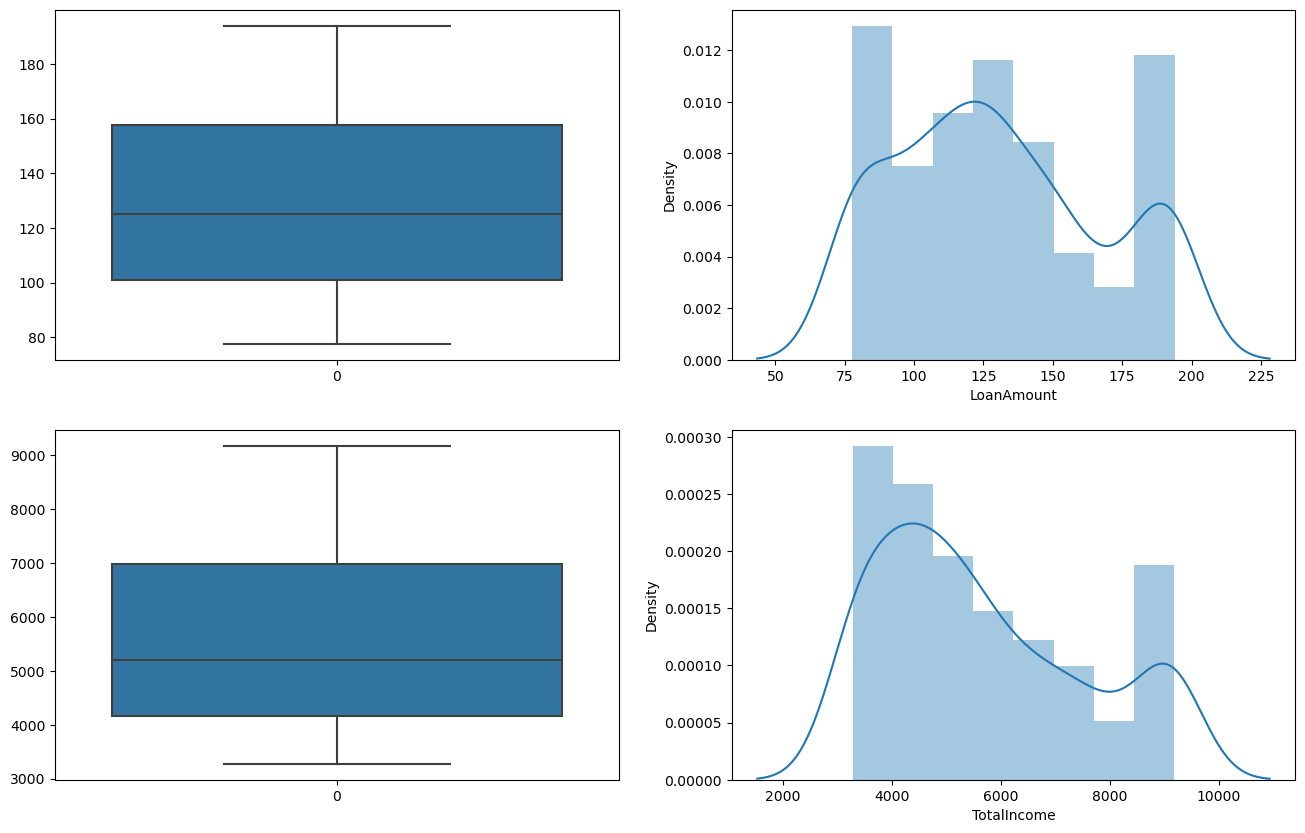

In [94]:
#After removing Outliers 
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.boxplot(df2['LoanAmount'])
plt.subplot(2,2,2)
sns.distplot(df2['LoanAmount'])
plt.subplot(2,2,3)
sns.boxplot(df2['TotalIncome'])
plt.subplot(2,2,4)
sns.distplot(df2['TotalIncome'])
plt.show()

In [95]:
df2.dtypes

Gender               object
Married              object
Dependents          float64
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
TotalIncome         float64
dtype: object

## Encoding

In [97]:
# Performing label encoding on specific columns

from sklearn.preprocessing import LabelEncoder
var_col2 = ['Gender','Married','Education','Self_Employed','Property_Area']
le2 = LabelEncoder()
for i in var_col2:
    df2[i] = le2.fit_transform(df2[i])

In [98]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,1,0.0,0,0,110.0,360.0,1.0,2,5720.0
1,1,1,1.0,0,0,126.0,360.0,1.0,2,4576.0
2,1,1,2.0,0,0,194.0,360.0,1.0,2,6800.0
3,1,1,2.0,0,0,100.0,360.0,1.0,2,4886.0
4,1,0,0.0,1,0,78.0,360.0,1.0,2,3276.0


## Feature Scaling

In [99]:
req_cols2 = ['LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 'Property_Area','Dependents']

In [100]:
x2 = df2[req_cols2]

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [102]:
x2.loc[:,['LoanAmount','TotalIncome']]  = sc.fit_transform(x2[['LoanAmount','TotalIncome']])

In [103]:
x2.head()

,LoanAmount,Loan_Amount_Term,TotalIncome,Property_Area,Dependents
0,-0.554729,360.0,0.031936,2,0.0
1,-0.122729,360.0,-0.570891,2,1.0
2,1.713272,360.0,0.601040,2,2.0
3,-0.824729,360.0,-0.407538,2,2.0
4,-1.418729,360.0,-1.255923,2,0.0
